# Predicting heart disease using machine learning
This norebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine learning model capabale of predicting whether or not someone has heart based disease on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
7. Experimentation

## 1. Problem Definition:
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 

The original data came from Cleaveland data from the UCI Machine Learning Repository.
There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age
age in years
2. sex
(1 = male; 0 = female)
3. cp
chest pain type:
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic 
4. trestbps
resting blood pressure (in mm Hg on admission to the hospital)
5. chol
serum cholestoral in mg/dl
6. fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg
resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach
maximum heart rate achieved
9. exang
exercise induced angina (1 = yes; 0 = no)
10. oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping 
11. ca
number of major vessels (0-3) colored by flourosopy
12. thal
    * 0 = normal
    * 1 = fixed defect
    * 2 = reversable defect
13. target
1 or 0:
   * 1: Someone has heart disease.
   * 0: No Heart Disease.

In [1]:
## Preparing the tools
# Regular EDA (Exploratory data analysis) and plotting libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

# we want our plots to appear inside the notebook.
%matplotlib inline 

# import Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data 

In [2]:
df = pd.read_csv("heart-disease.csv")
# (rows, columns)
df.shape
# df.head()

(303, 14)

## Explatorary data Analysis (EDA).
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

Steps:
    1. What question(s) are you trying to soleve?
    2. What kind of data do we have and how do we treat different types?
    3." What's missing from the data and how do you deal with it?"
    4. Where are the outliers and why should you care about them?
    5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find out how many of each class there.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1---> Somone has heart disease.
0---> Somone does not have heart disease.

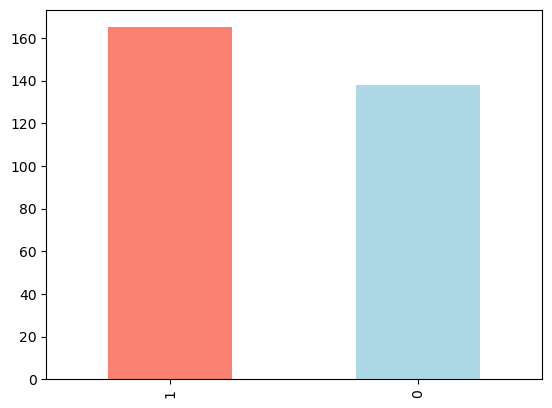

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are ther any missing values in our data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency According To Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Comparing sex column with target column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

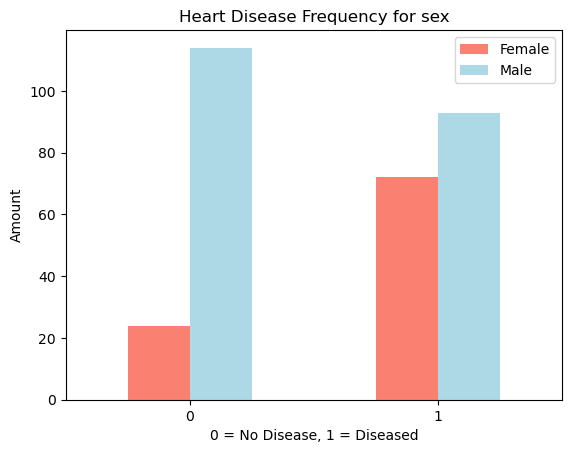

In [11]:
# Create a plot of Crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Diseased")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# Age vs. Max Heart Rate for Heart Disease 

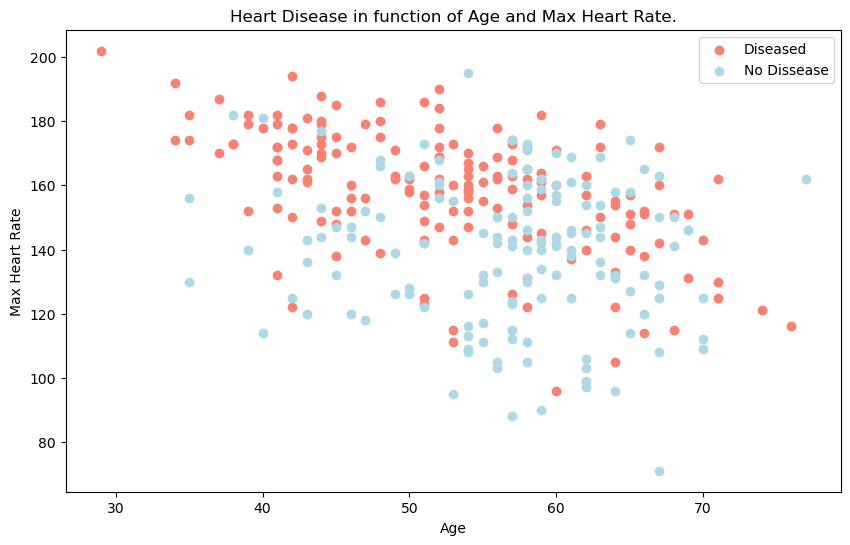

In [12]:
# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with positive examples.
plt.scatter(df.age[df.target==1],
             df.thalach[df.target==1],
             c="salmon")

# plt with negative examples
plt.scatter(df.age[df.target==0],
             df.thalach[df.target==0],
             c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate.")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseased", "No Dissease"]);

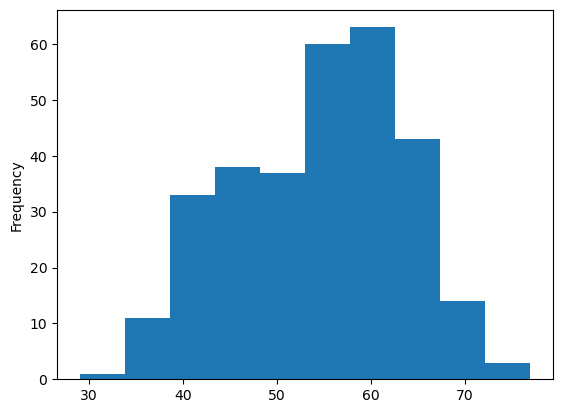

In [13]:
# Check the distribution of the age column with Histogram
df.age.plot.hist();

### Heart Disease Frequency per chest pain type:

chest pain type:
*    Value 0: typical angina
*    Value 1: atypical angina
*    Value 2: non-anginal pain
*    Value 3: asymptomatic 



In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


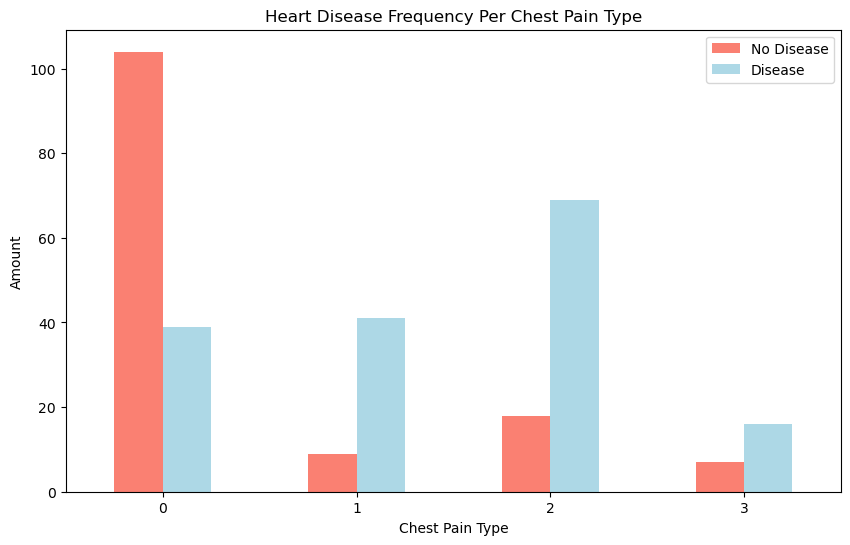

In [15]:
# Make a crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]
                                  )

# Add Some Communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


In [16]:
# MAke a correlation Matrix.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


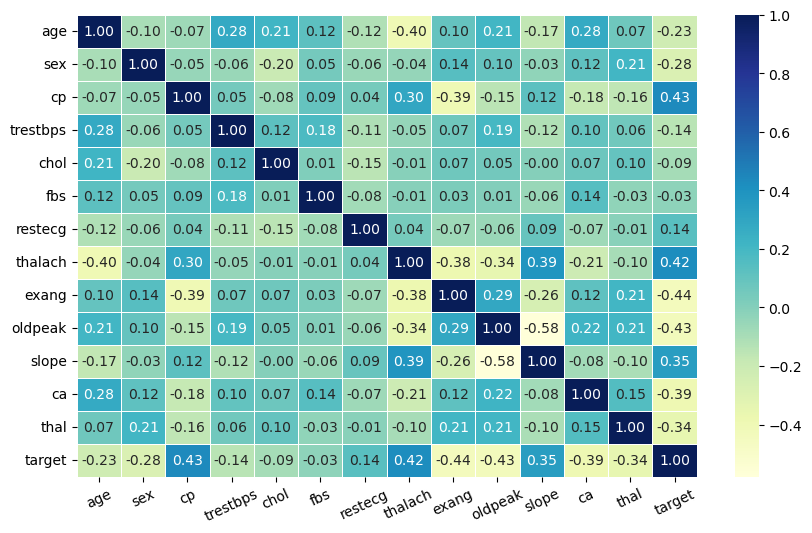

In [17]:
# Visualize the correlation matrix.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt="0.2f",
                 cmap="YlGnBu")
plt.xticks(rotation=25);


# 5. Modeling 

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split Data Into X and Y
X = df.drop("target", axis=1)

y = df["target"]

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split data into train and test sets.
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [23]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


Now we've got our data split into training and test seets, it's time to build a machine learning model

We'll train it (Fing the patterns) on the training set.

And we'll test it (use patterns) on the test set.

WE're going to try 3 different machine learning models:
1. Logoistic REgression.
2. K-Nearest Neighbour.
3. Random Forest Classifier.

In [24]:
# Put Models in dictionary.
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier() 
        }

# Create a fucntion to fit and score models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: A dict of different Scikit-Learm machine learning models.
    X_train: training data (no Labels).
    X_test: testing data (No Label).
    y_train: training labels.
    y_test: testing labels.
    """
    
    # Set random seed.
    np.random.seed(42)
    # Make a dictionary to keep model scores.
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data.
        model.fit(X_train, y_train)
        # Eva;uate the model and append it's score to model_scores.
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores =  fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

C:\Users\Vishwajeet\Milestone-Project-1-HeartDisease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model_scores 

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

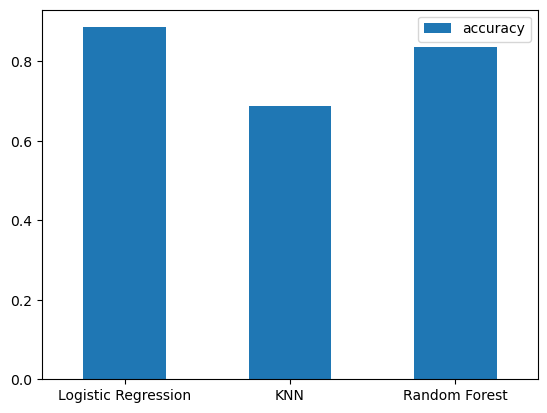

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0);
# model_compare.T.plot().bar()

Let's Look st the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall 
* F1 score
* Classification report
* ROC curve 
> An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

* Area under the curve (AUC)

## Hyperparamter Tuning (By Hand)

In [28]:
# Let's Tune KNN.
train_scores = []
test_scores = []

# Create a list of different value for n_neighbours.
neighbours = range(1, 21)

# Instance for KNN
knn = KNeighborsClassifier()

# Loop through differnt n_neighbours
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the model to data.
    knn.fit(X_train, y_train)
    
    # Update the training scores list.
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list.
    test_scores.append(knn.score(X_test, y_test))
    
    

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.4%


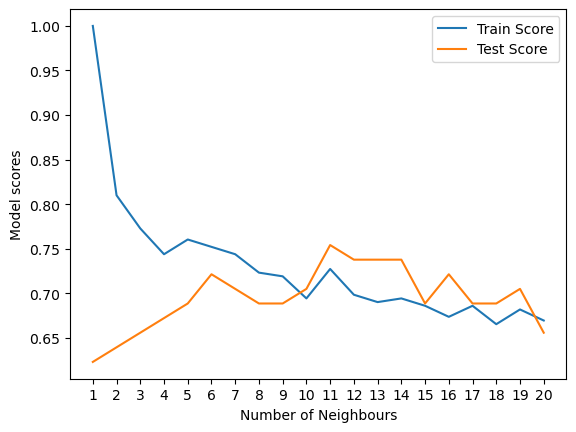

In [31]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.1f}%")

## Hyperpaamter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RadnomForestClassifier()

...using andomaziedSearchCV

In [32]:
# Create a Hyperparameter grid for LogisticRegression.
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]
               }
# Create Hyperparameter grid fror RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got the hyperparameters grids setup for each of our models, let's tune them usaing RandomizedSearchCV...

In [33]:
# Tune LogisticRegression 
np.random.seed(42)

# Setup random hyperparamter search for logisticRegression.
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5, # Cross-validation: Here 5 means 5 versions of training data and 5 versions of test data.
                                n_iter=20,
                                verbose=True,
                                error_score='raise')

# Fit random Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

### Now we've tuned LogisticRegression() Let's do the same for RandomForestClassifier()....

In [36]:
# Tune RandomForestClassifier. 
np.random.seed(42)

# Setup random hyperparamter search for logisticRegression.
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5, 
                                n_iter=20,
                                verbose=True,
                                error_score='raise')

# Fit random Hyperparameter search model for LogisticRegression
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [38]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

### We did hyperparamater Tuning by `Hand` , by `RandomizedSearchCV` and now we will do it using `GridSearchCV` 

## Hyperparamter Tuning with GridSearchCV 

since our LogisticRegression model provides the best scores so far, we'll try and imrove them again using GridSearchCV...

In [39]:
# Different hyperparameters for our LogisticRegression model.
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]
               }

# Setup grid hyperparameters search for LogisticRegression.
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          error_score='raise')

# Fit grid hyperparamter search model.
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating out tuned machine learning classifier, beyound accuracy

* ROC Curve
* Confusion matrix
* Classification report
* Recall
* Precision
* F1-score

... and it would be great if cross-validation was where possible.


To make comparisions and evaluate our trained model, first we need to make predictions.

In [42]:
# Make preeiction with our tuned model.
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

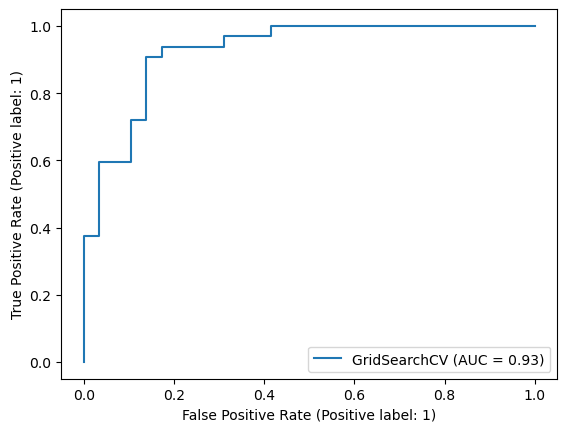

In [45]:
# Plot ROC curve and calculate AUC metric.
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [46]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


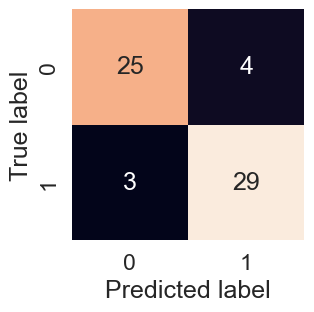

In [47]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

    # Just in case if the values in the below plot do not come properly or goes either above the margin or vice versa.
         #bottom, top = ax.get_ylim()
         #ax.set_ylim(bottom + 0.5,top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC curve and a confusion matrix, let's get a  classification report as well as cross-validation precision, recall and f1-score. 

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculculate evaluation matrix using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` 

In [49]:
# Check the best Hyperparameters.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# Create a new classifier with best parameters
clf= LogisticRegression(C= 0.20433597178569418,
                        solver="liblinear")

In [51]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [52]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [54]:
# Cross-validation precision
cv_precision = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [55]:
# Cross-validation recall
cv_recall = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf,
                         X, 
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

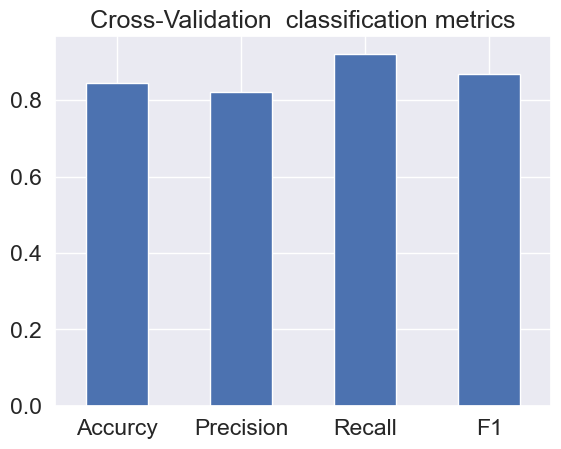

In [61]:
cv_metrics = pd.DataFrame({"Accurcy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0]
                         )
cv_metrics.T.plot.bar(title="Cross-Validation  classification metrics",
                      legend=False)
plt.xticks(rotation=0);

### Feature Importance.

Featire importance is another as asking, "ehich features contributed most to the outcomes of the model and how they contribute?"

Findinf feature importance is different for each machine learning model

Let's find the feature importance for our LogisticRegression model...

In [63]:
# Fit an instance of LogisticRegression.
clf= LogisticRegression(C= 0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [64]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

**coef_** --> coef_ − array, shape(n_features,) or (n_targets, n_features) It is used to estimate the coefficients for the linear regression problem. It would be a 2D array of shape (n_targets, n_features) if multiple targets are passed during fit.

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## The result of the  below block of code will tell us that how much of the attributes from the above column is  contributing to predict the target variable.

In [65]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

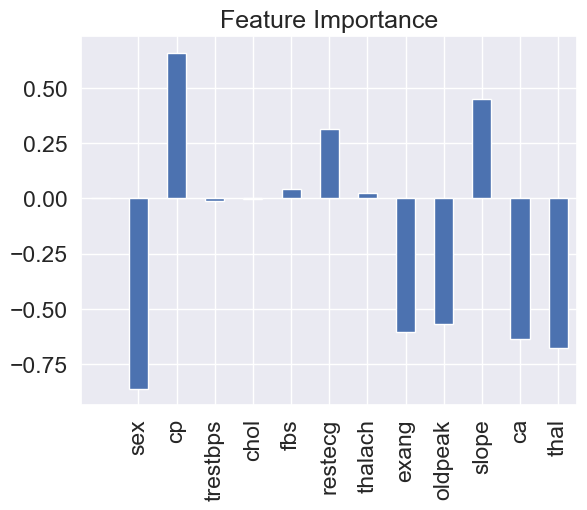

In [74]:
# Visualixe the feature importance (The above thing).
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.xticks(np.arange(1, 13, 1));

In [77]:
# pd.crosstab(df.sex, df.target)
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


# What next?

If you haven't hit your evaluation metric yet.....ask yourself...
* Could you collect more data?
* Could you try a better models? Like CatBoot or XGBoost?
* could you improve the current models? (beyound wha we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others.